In [5]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re


In [6]:
# Load the image
image = cv2.imread('invoice-template-us-neat-750px.png')

In [32]:

def read_character(roi_coordinates):
    """
    This will read the image part and find the word or number in it
    """
    # Iterate over the ROIs
    for i, (x1, y1, x2, y2) in enumerate(roi_coordinates):
        # Ensure the coordinates are within the image dimensions
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(image.shape[1], x2)
        y2 = min(image.shape[0], y2)
    
        # Crop the ROI from the image
        roi = image[y1:y2, x1:x2]
    
        # Convert the ROI to grayscale
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # Display the grayscale ROI
        plt.figure()
        plt.imshow(cv2.cvtColor(gray_roi, cv2.COLOR_GRAY2RGB))
        plt.axis('off')
        plt.show()
    
        # Apply image preprocessing if required
        # Example 1: Thresholding
        _, thresholded_roi = cv2.threshold(gray_roi, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
        # Example 2: Denoising (using a bilateral filter)
        denoised_roi = cv2.bilateralFilter(thresholded_roi, 9, 75, 75)
    
        # Perform OCR on the preprocessed ROI using pytesseract
        extracted_text = pytesseract.image_to_string(denoised_roi, config='--psm 7')  # Use page segmentation mode 7 for treating the image as a single line of text
        
        # Extract numbers from the extracted text
        numbers = re.findall(r'\d+', extracted_text)
        
        # Display the extracted numbers
        if numbers:
            print(f"Numbers from ROI: {'.'.join(numbers)}")
        else:
            print(f"No numbers found in ROI")


In [33]:
image_parts = [{'x1':640, 'y1':385, 'x2':690, 'y2':400}, 
               {'x1':640, 'y1':410, 'x2':690, 'y2':435}, 
               {'x1':640, 'y1':448, 'x2':690, 'y2':470}]

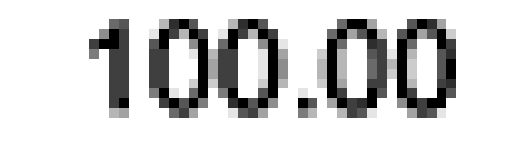

Numbers from ROI: 100.00


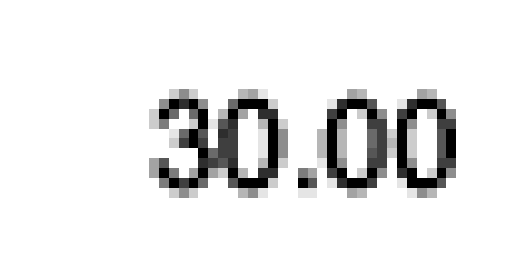

Numbers from ROI: 30.00


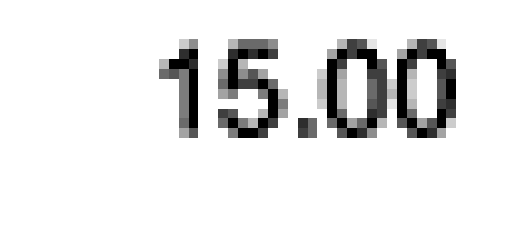

Numbers from ROI: 15.00


In [35]:
# Define the regions of interest (ROIs) where you want to extract data
for coordinate in image_parts:
    x1, y1, x2, y2 = coordinate.values()
    roi_coordinates = [
        (x1, y1, x2, y2),  # Format: (top-left x, top-left y, bottom-right x, bottom-right y)
        # Add more ROI coordinates as needed
    ]
    read_character(roi_coordinates)
